#  Notebook projet Movie4You

## Librairie

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
current_time = datetime.datetime.now()

%matplotlib inline


# machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression

## Exploration des données

Les informations sur le film se trouvent dans le fichier "movies.dat" et se trouvent ci-dessous
format:

MovieID::Title::Genres

- Les titres sont identiques aux titres fournis par l'IMDB (y compris année de sortie);
- Les genres sont séparés par des barres et sont sélectionnés parmi les genres suivants :
	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western
- Certains MovieID ne correspondent pas à un film en raison d'une duplication accidentelle inscriptions et/ou inscriptions aux tests;
- Les films sont pour la plupart saisis à la main, des erreurs et des incohérences peuvent donc exister;

In [2]:
#Import Movies Dataset
dfMovies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python' , encoding='latin-1')
# Exemple de donnée enregistré
dfMovies.head(20)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Toutes les notes sont contenues dans le fichier "ratings.dat" et se trouvent dans le
format suivant :

UserID::MovieID::Rating::Timestamp

- Les ID utilisateur vont de 1 à 6040
- Les MovieID vont de 1 à 3952
- Les notes sont établies sur une échelle de 5 étoiles (notes entières uniquement)
- L'horodatage est représenté en secondes depuis l'époque renvoyée par time(2)
- Chaque utilisateur a au moins 20 notes

In [3]:
#Import Ratings Dataset
dfRatings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python' , encoding='latin-1')
# Exemple de donnée enregistré
dfRatings.head(20)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


Les informations utilisateur se trouvent dans le fichier "users.dat" et se trouvent ci-dessous
format:

UserID::Gender::Age::Occupation::Zip-code

Toutes les informations démographiques sont fournies volontairement par les utilisateurs et sont pas vérifié pour l'exactitude. Seuls les utilisateurs ayant fourni des données démographiques sont incluses dans cet ensemble de données.

- Le sexe est indiqué par un « M » pour homme et un « F » pour femme.
- L'âge est choisi parmi les fourchettes suivantes :
    * 1 : « Moins de 18 ans »
    * 18 : « 18-24 »
    * 25 : "25-34"
    * 35 : "35-44"
    * 45 : "45-49"
    * 50 : "50-55"
    * 56 : "56+"
- La profession est choisie parmi les choix suivants :
    * 0 : « autre » ou non précisé
    * 1 : « universitaire/éducateur »
    * 2 : « artiste »
    * 3 : « employé de bureau/administrateur »
    * 4 : « étudiant/étudiant diplômé »
    * 5 : « service client»
    * 6 : « médecin/soignant »
    * 7 : « cadre/manager »
    * 8 : « agriculteur »
    * 9 : « femme au foyer »
    * 10 : « Élève de la maternelle à la 12e année »
    * 11 : « avocat »
    * 12 : « programmeur »
    * 13 : « retraité »
    * 14 : « ventes/marketing »
    * 15 : « scientifique »
    * 16 : « indépendant »
    * 17 : « technicien/ingénieur »
    * 18 : « commerçant/artisan »
    * 19 : « chômeurs »
    * 20 : « écrivain »
- Code postal pour l'emplacement de l'utilisateur.

In [4]:
#Import Users Dataset
dfUsers = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python' , encoding='latin-1')
# Exemple de donnée enregistré
dfUsers.head(20)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


## Distributions des données

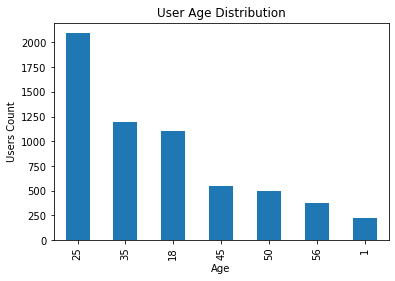

In [5]:
dfUsers['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

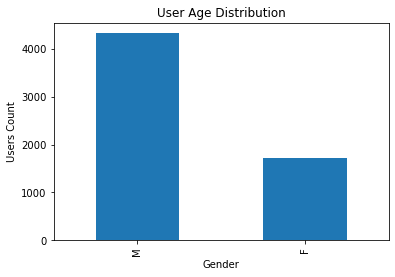

In [6]:
dfUsers['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

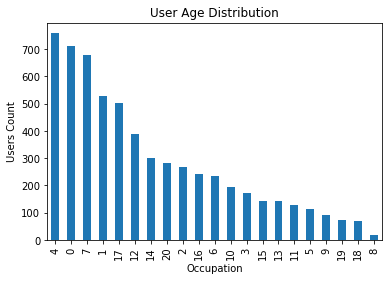

In [7]:
dfUsers['Occupation'].value_counts().plot(kind='bar')
plt.xlabel("Occupation")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

## Classement

Pour la suite nous allons faire une jointure des trois tables

In [8]:
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


### Classement par note pour un film

In [9]:
toystoryRating = dfMaster[dfMaster['Title'].str.contains('Toy Story') == True]
toystoryRating.sort_values(by=['Rating'], ascending=False)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
355033,1,Toy Story (1995),Animation|Children's|Comedy,3709,5,966275789,M,25,12,89502
359932,1,Toy Story (1995),Animation|Children's|Comedy,3751,5,966128204,F,35,12,55555
359775,1,Toy Story (1995),Animation|Children's|Comedy,3749,5,966133515,F,25,0,60664
359229,1,Toy Story (1995),Animation|Children's|Comedy,3738,5,966209247,M,45,7,01904-1355
...,...,...,...,...,...,...,...,...,...,...
980130,3114,Toy Story 2 (1999),Animation|Children's|Comedy,4703,1,963541230,M,25,7,02035
449972,3114,Toy Story 2 (1999),Animation|Children's|Comedy,4626,1,964114390,M,25,14,97219
369550,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3822,1,971466624,M,45,20,98027
868426,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2043,1,974666636,M,25,14,37931


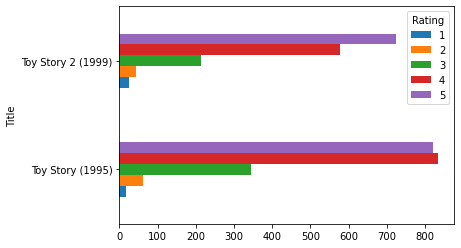

In [10]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

### Classement pour tous les films

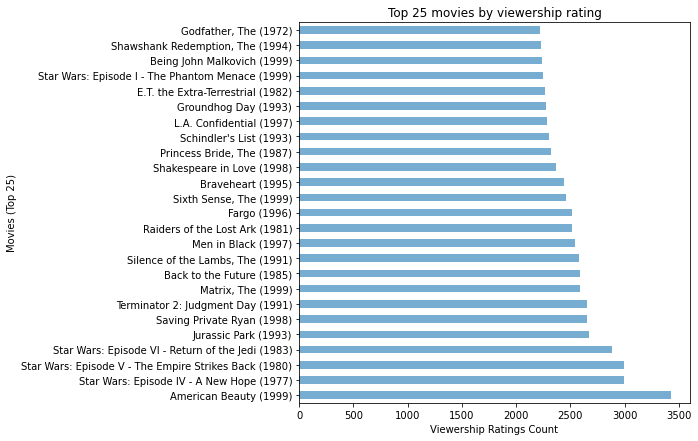

In [81]:
dfTop15 = dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop15.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

### Classement pour un utilisateur

In [12]:
userId = 2696
userRatingById = dfMaster[dfMaster["UserID"] == userId]
userRatingById.sort_values(by=['Rating'], ascending=False)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991045,1645,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,4,973308904,M,25,7,24210
991047,1783,Palmetto (1998),Film-Noir|Mystery|Thriller,2696,4,973308865,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991053,3176,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,2696,4,973308865,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991051,2389,Psycho (1998),Crime|Horror|Thriller,2696,4,973308710,M,25,7,24210
991049,1892,"Perfect Murder, A (1998)",Mystery|Thriller,2696,4,973308904,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210


## Classement sur les occupations

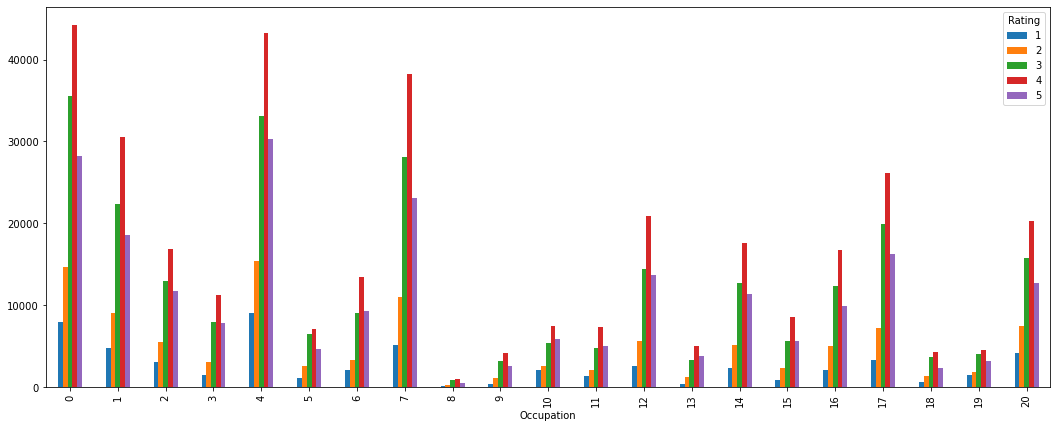

In [13]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',figsize=(18,7),stacked=False,legend=True)
plt.show()

# Néttoyage des données

## Néttoyage sur les genres

In [14]:
#dfGenres = dfMaster[]
dfGenres = dfMaster['Genres'].str.split("|")
dfGenres
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))
# All Unique genres
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [15]:
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)
dfMaster.columns
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


## Néttoyage année de sortie

In [16]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)
dfMaster = dfMaster.drop(columns=["title"])
dfMaster['Year'] = dfMaster.Year.astype(int)
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


## Néttoyage sur le genre utilisateur

In [17]:
dfMaster['Gender'] = dfMaster.Gender.replace('F','1')
dfMaster['Gender'] = dfMaster.Gender.replace('M','0')
dfMaster['Gender'] = dfMaster.Gender.astype(int)
dfMaster.head()
#dfMaster = dfMaster.drop(columns=["zzz"])

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [18]:
dfMaster['zzz'] = dfMaster["Rating"]
dfMaster["zzz"] = dfMaster.zzz.replace(5,1)
dfMaster['zzz'] = dfMaster.zzz.replace(4,1)
dfMaster["zzz"] = dfMaster.zzz.replace(3,1)
dfMaster["zzz"] = dfMaster.zzz.replace(2,1)
dfMaster["zzz"] = dfMaster.zzz.replace(1,1)


## Néttoyage des noms de colonne

In [19]:
col = []
for i in dfMaster.columns:
    i = i.replace('-','_')
    i = i.replace('(','_')
    i = i.replace(')','_')
    i = i.replace("'",'_')
    col.append(i)
dfMaster.columns = col
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,Year,Movie_Age,zzz
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,1995,5,1
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,1,0,1,0,0,0,0,1995,5,1
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,1995,5,1
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,1,0,0,0,1977,23,1
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,1,0,1993,7,1


## Néttoyage code postal

In [98]:
col = []
dfMaster['Zip_code'] = dfMaster.Zip_code.astype(str)
for i in dfMaster['Zip_code']:
    if len(i) != 5:
        col.append(0) 
    else:
        col.append(i)
dfMaster['Zip_code'] = col
dfMaster['Zip_code'] = dfMaster.Zip_code.astype(int)

# Classement après nettoyage

## Classement sur le genre utilisateur

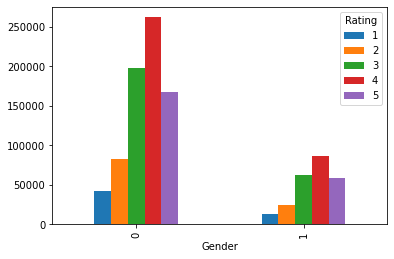

In [20]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

## Classement sur l'âge de l'utilisateur

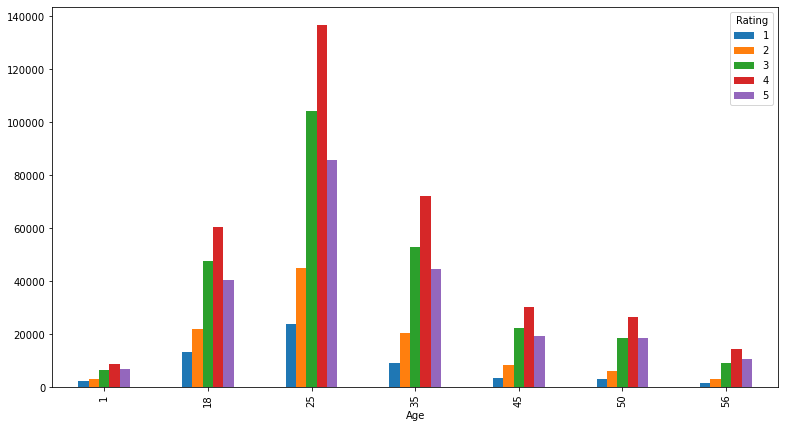

In [21]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,figsize=(13,7),legend=True)
plt.show()

## Classement par année de sortie

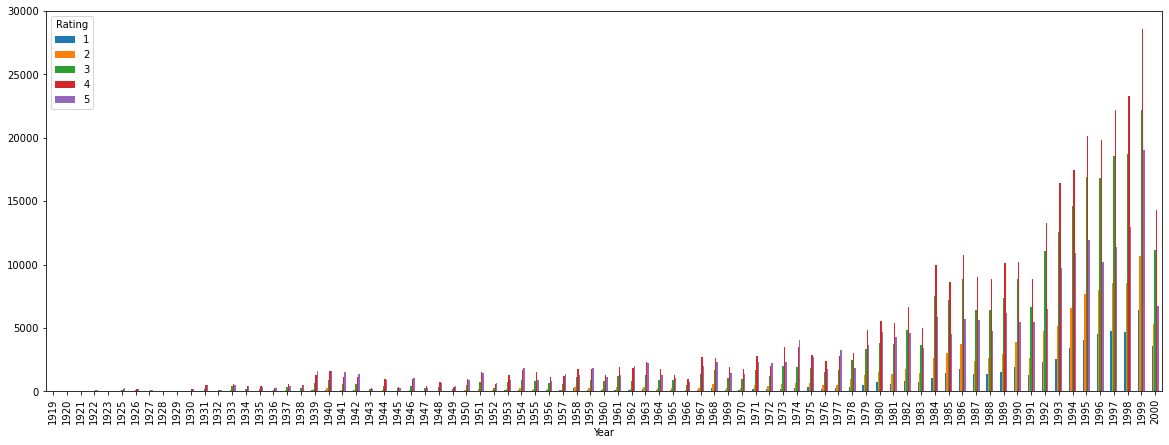

In [22]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',figsize=(20,7),stacked=False,legend=True)
plt.show()

## Classement par âge des films

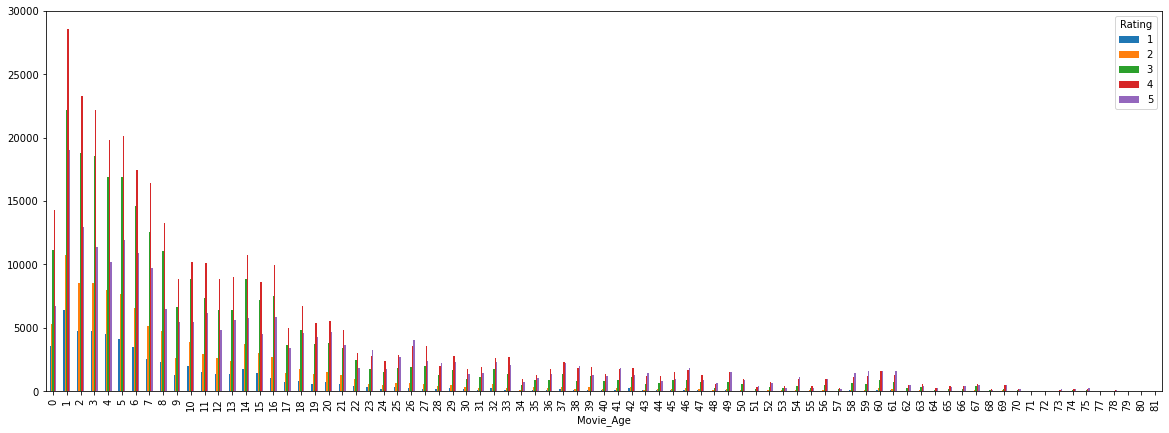

In [77]:
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',figsize=(20,7),stacked=False,legend=True)
plt.show()

# Prédiction pour la suggestion de films

## Construction du modèle

In [24]:
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [106]:
#First 500 extracted records
first_500 = dfMaster[:1000]
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Rating','UserID','Timestamp','Age','Occupation','Zip_code','Year','Movie_Age']].values
#Use rating as label
labels = first_500[['zzz']].values

train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

## Regression linéaire

In [105]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

ValueError: could not convert string to float: 'Mister Roberts (1955)'

In [99]:
# import packages
import statsmodels.api as sm
  
y = dfMaster['zzz']

#define predictor variables
x = dfMaster[['MovieID','Rating','UserID','Timestamp','Age','Occupation','Zip_code','Year','Movie_Age' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()
  
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    zzz   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -1.250e+05
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               1.00
Time:                        20:23:24   Log-Likelihood:             2.8797e+07
No. Observations:             1000209   AIC:                        -5.759e+07
Df Residuals:                 1000200   BIC:                        -5.759e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           5e-07   4.46e-21   1.12e+14      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [107]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [115]:
userRatingById = dfMaster[:10000]
cv=CountVectorizer(max_features=10000, stop_words='english')
vector=cv.fit_transform(userRatingById['Genres'].values.astype('U')).toarray()

similarity=cosine_similarity(vector)

In [116]:
def recommand(movies):
    index=dfMaster[dfMaster['Title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(dfMaster.iloc[i[0]].Title)
recommand("Star Wars: Episode IV - A New Hope (1977)")

Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode IV - A New Hope (1977)
Tron (1982)
Star Wars: Episode I - The Phantom Menace (1999)
Star Wars: Episode IV - A New Hope (1977)
